# Lecture 5

In [2]:
import numpy as np
import matplotlib.pylab as plt

In [3]:
# Implement a function taking X and K as input that returns Phi(X)
# of shape N x K, the Vandermonde Matrix associated with X

def vander(X, K):
    phi = np.zeros((len(X), K))
    for i in range(K):
        phi[:, i] = X**i
    return phi

In [4]:
rng = np.random.default_rng()

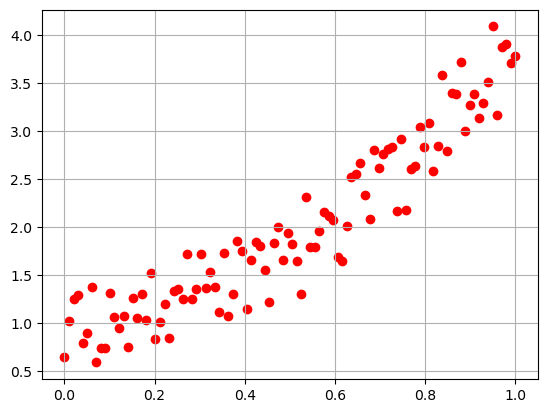

In [5]:
# Create the test problem
N = 100 # Number of data points
K = 4 # Correct degree +1 of polynomial

# Define the domain
a = 0
b = 1

# Define the true solution
theta_true = np.ones((K, ))

# Linspace of X in a, b
X = np.linspace(a, b, N)

# Define Y such that theta_true is the solution of
# Phi(X)*theta = Y
Phi = vander(X, K)
Y = Phi @ theta_true

# Corrupt Y with noise
sigma = 0.3 # SD of the noise
Y = Y + rng.normal(0, sigma, Y.shape) # Noisy Y

# Plot X againt Y, with red dots (not continuos line)
plt.scatter(X, Y, c="red")
plt.grid()
plt.show()

In [6]:
# Given X and Y, compute a solution theta_mle
theta_mle = np.linalg.solve(Phi.T @ Phi, Phi.T @ Y)
# The optimal is to to compute the Cholesky because Phi.T @ Phi is semi positive definitive

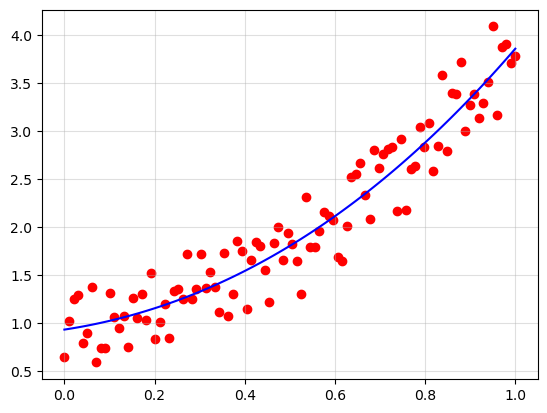

In [7]:
# Plot f_theta(x) in the same plot of X and Y to check the approximation
# To get greater resolution compute the linear system with a linspace with more samples
plt.scatter(X, Y, c="red")
plt.plot(X, Phi @ theta_mle, c="b")
plt.grid(alpha=0.4)
plt.show()

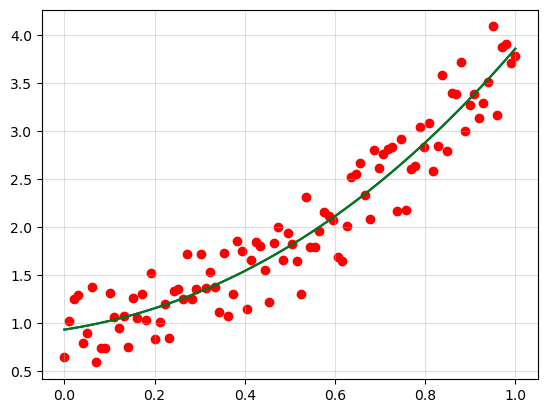

In [16]:
# X and Y are fixed

# Pretend not to know K
K_trial = 4


Phi_trial = vander(X, K_trial)
theta_mle_trial = np.linalg.solve(Phi_trial.T @ Phi_trial, Phi_trial.T @ Y)

X_high_res = np.linspace(a, b, 1000)
Y_high_res = vander(X_high_res, K_trial) @ theta_mle_trial

# Plot the new model on the same plot of the dataset
plt.scatter(X, Y, c="red")
plt.plot(X, Phi @ theta_mle, c="b")
plt.plot(X_high_res, Y_high_res, c="g")
plt.grid(alpha=0.4)
plt.show()

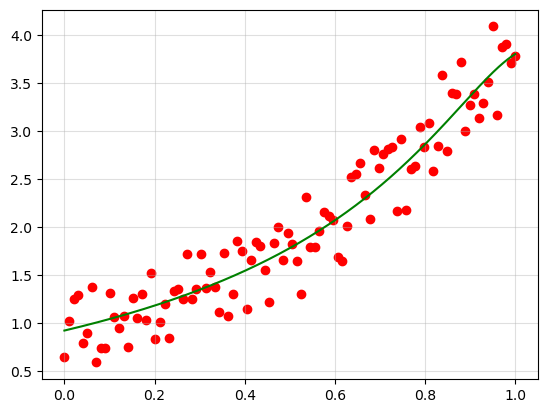

In [28]:
# X and Y are fixed

# Set K_trial
K_trial = 30

# Set lambda
l = 0.5

# Compute vandermonde problem
Phi = vander(X, K_trial)

# Solve theta_MAP
theta_map = np.linalg.solve(Phi.T @ Phi + np.identity(K_trial) * l, Phi.T @ Y)

X_high_res = np.linspace(a, b, 10000)
Y_high_res = vander(X_high_res, K_trial) @ theta_map

plt.scatter(X, Y, c="red")
plt.plot(X_high_res, Y_high_res, c="g")
plt.grid(alpha=0.4)
plt.show()